In [4]:

import os
for dirname, _, filenames in os.walk('../input/skin-cancer-malignant-vs-benign'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../input/skin-cancer-malignant-vs-benign/data/test/benign/1269.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/623.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/820.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/1354.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/45.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/369.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/1711.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/1173.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/1488.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/436.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/1409.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/71.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/1055.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/215.jpg
../input/skin-cancer-malignant-vs-benign/data/test/benign/185.jpg
../in

In [6]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D #images are two dimensional. Videos are three dimension.
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D #images are two dimensional. Videos are three dimension.
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# VISUALIZING THE IMAGE

**Malignant Skin cancer**

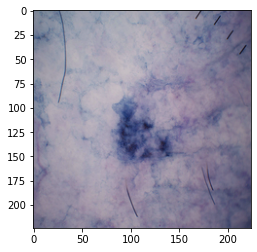

In [24]:
plt.imshow(cv2.imread("../input/skin-cancer-malignant-vs-benign/test/malignant/1027.jpg"))

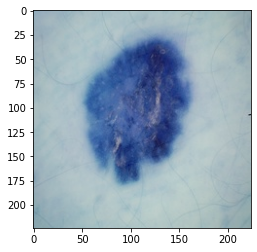

In [25]:
plt.imshow(cv2.imread("../input/skin-cancer-malignant-vs-benign/train/malignant/101.jpg"))

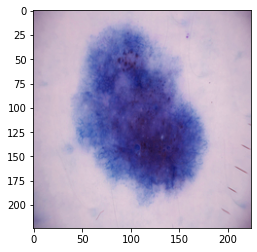

In [26]:
plt.imshow(cv2.imread("../input/skin-cancer-malignant-vs-benign/train/malignant/1031.jpg"))

**Benign Skin Cancer**

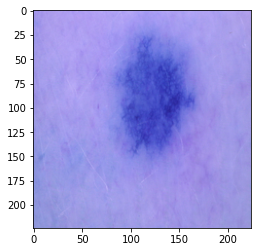

In [27]:
plt.imshow(cv2.imread("../input/skin-cancer-malignant-vs-benign/train/benign/1010.jpg"))

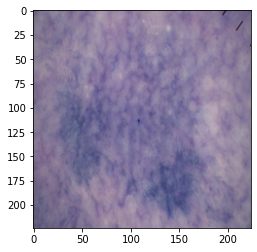

In [28]:
plt.imshow(cv2.imread("../input/skin-cancer-malignant-vs-benign/train/benign/1035.jpg"))

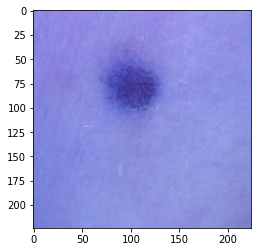

In [29]:
plt.imshow(cv2.imread("../input/skin-cancer-malignant-vs-benign/train/benign/1041.jpg"))

# Data Augumentation

In [7]:
image_size=224
train_generator=ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_set = train_generator.flow_from_directory(
        '../input/skin-cancer-malignant-vs-benign/train',
        target_size=(image_size, image_size),
        batch_size=64,
        class_mode='binary')


Found 2637 images belonging to 2 classes.


In [8]:
image_size=224
test_generator=ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_set = test_generator.flow_from_directory(
        '../input/skin-cancer-malignant-vs-benign/test',
        target_size=(image_size, image_size),
        batch_size=64,
        class_mode='binary')

Found 660 images belonging to 2 classes.


# Convolution Layers and Neural Network

In [11]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(train_set, validation_data=test_set, epochs=25)

Epoch 1/25
42/42 [==============================] - 57s 1s/step - loss: 0.6454 - accuracy: 0.6134 - val_loss: 0.4663 - val_accuracy: 0.7621
Epoch 2/25
42/42 [==============================] - 43s 1s/step - loss: 0.4615 - accuracy: 0.7718 - val_loss: 0.4130 - val_accuracy: 0.7788
Epoch 3/25
42/42 [==============================] - 43s 1s/step - loss: 0.4267 - accuracy: 0.7792 - val_loss: 0.3934 - val_accuracy: 0.7894
Epoch 4/25
42/42 [==============================] - 43s 1s/step - loss: 0.4088 - accuracy: 0.7921 - val_loss: 0.3573 - val_accuracy: 0.8136
Epoch 5/25
42/42 [==============================] - 42s 1s/step - loss: 0.3715 - accuracy: 0.8266 - val_loss: 0.3508 - val_accuracy: 0.8409
Epoch 6/25
42/42 [==============================] - 43s 1s/step - loss: 0.4071 - accuracy: 0.8056 - val_loss: 0.3747 - val_accuracy: 0.8015
Epoch 7/25
42/42 [==============================] - 42s 1s/step - loss: 0.3939 - accuracy: 0.8044 - val_loss: 0.3495 - val_accuracy: 0.8212
Epoch 8/25
42/42 [==

# Prediction

**Malignant Tumor**

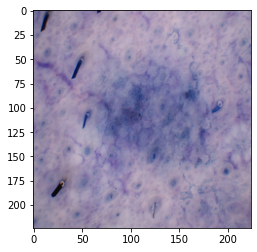

In [30]:
plt.imshow(cv2.imread("../input/skin-cancer-malignant-vs-benign/test/malignant/1135.jpg"))

In [23]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../input/skin-cancer-malignant-vs-benign/test/malignant/1135.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_set.class_indices
print(result)
if result[0]==1:
    print("You have malignant Skin cancer")
else:
    print("You have benign(Not harmful) Skin cancer")

[[1.]]
You have malignant Skin cancer


**Benign Tumor**

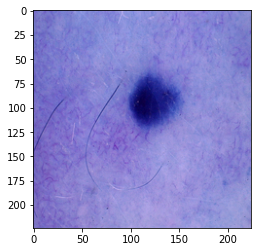

In [33]:
plt.imshow(cv2.imread("../input/skin-cancer-malignant-vs-benign/test/benign/1118.jpg"))

In [31]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../input/skin-cancer-malignant-vs-benign/test/benign/1118.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_set.class_indices
print(result)
if result[0]==1:
    print("You have malignant Skin cancer")
else:
    print("You have benign(Not harmful) Skin cancer")

[[0.]]
You have benign(Not harmful) Skin cancer


**Our model performs well on testing. It predicts 89% accurately**